<a href="https://colab.research.google.com/github/whitew1994WW/SheffieldCopdAnalysis/blob/main/MethodAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheffield COPD Analysis

# Load in the data

I load in the data from my google drive. If you are running it locally as an ipynb you can ignore the cell below and point the unzipping command at the zipped repo.

In [ ]:
# For remote demonstration
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Job Hunt/2023/Senior Data Scientist Task.zip' '/tmp/task.zip'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /tmp/task -d /tmp/repo

Archive:  /tmp/task.zip
replace /tmp/repo/GP Indicators.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /tmp/repo/GP Indicators.csv  
replace /tmp/repo/GP to CCG21 to STP21 to NHS Region21.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /tmp/repo/GP to CCG21 to STP21 to NHS Region21.csv  
replace /tmp/repo/gp-reg-pat-prac-sing-age-female.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /tmp/repo/gp-reg-pat-prac-sing-age-female.csv  
replace /tmp/repo/gp-reg-pat-prac-sing-age-male.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /tmp/repo/gp-reg-pat-prac-sing-age-male.csv  
replace /tmp/repo/Senior Data Scientist Technical Task.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /tmp/repo/Senior Data Scientist Technical Task.pdf  


Load in each of the datasets

In [ ]:
import pandas as pd
import os

# Remote folder 
folder = '/tmp/repo'

gp_indicators = pd.read_csv(os.path.join(folder, 'GP Indicators.csv'))
gp_region_mapping = pd.read_csv(os.path.join(folder, 'GP to CCG21 to STP21 to NHS Region21.csv'))
gp_female = pd.read_csv(os.path.join(folder, 'gp-reg-pat-prac-sing-age-female.csv'))
gp_male = pd.read_csv(os.path.join(folder, 'gp-reg-pat-prac-sing-age-male.csv'))

# Exploratory Data Analysis

Lets look at each of the datasets in turn to understand how they connect, the different types of feature, if there are any missing values and get an idea of how they are distributed.

##GP Indicators

Renaming to a common join key

In [ ]:
gp_indicators.rename({'Area Code': 'GP.Id'}, axis=1, inplace=True)

In [ ]:
gp_indicators.head()

,GP.Id,Asthma: QOF prevalence (6+ yrs),Atrial fibrillation: QOF prevalence (all ages),CHD: QOF prevalence (all ages),CKD: QOF prevalence (18+ yrs),COPD: QOF prevalence (all ages),Diabetes: QOF prevalence (17+ yrs),Heart Failure: QOF prevalence (all ages),Hypertension: QOF prevalence (all ages),Record of offer of support and treatment in the last 24 months for smokers aged 15+ yrs (denominator incl. PCAs),...,Atrial fibrillation: QOF prevalence (all ages) (Denominator),CHD: QOF prevalence (all ages) (Denominator),CKD: QOF prevalence (18+ yrs) (Denominator),COPD: QOF prevalence (all ages) (Denominator),Diabetes: QOF prevalence (17+ yrs) (Denominator),Heart Failure: QOF prevalence (all ages) (Denominator),Hypertension: QOF prevalence (all ages) (Denominator),Record of offer of support and treatment in the last 24 months for smokers aged 15+ yrs (denominator incl. PCAs) (Denominator),Smoking: QOF prevalence (15+ yrs) (Denominator),Stroke: QOF prevalence (all ages) (Denominator)
0,A81001,8.03994,2.37330,3.80717,3.29295,2.57108,9.31373,1.35970,14.58591,88.50365,...,4045,4045.0,3219.0,4045.0,3264.0,4045.0,4045.0,548.0,3373.0,4045.0
1,A81002,7.48959,2.73121,4.72147,6.31642,3.40184,8.29998,1.22769,17.79340,92.46783,...,18490,18490.0,15056.0,18490.0,15241.0,18490.0,18490.0,2642.0,15658.0,18490.0
2,A81004,6.33796,2.47659,3.53927,4.95501,2.53963,7.41906,0.95461,14.67039,99.05336,...,11104,11104.0,8779.0,11104.0,8896.0,11104.0,11104.0,1162.0,9165.0,11104.0
3,A81005,6.64245,3.03143,4.14501,1.74096,2.54887,7.94427,0.90324,18.10195,97.64521,...,8082,8082.0,6663.0,8082.0,6747.0,8082.0,8082.0,637.0,6949.0,8082.0
4,A81006,7.64373,2.59392,4.22458,2.90348,3.76359,8.78913,1.40361,16.19650,95.74737,...,14534,14534.0,11469.0,14534.0,11628.0,14534.0,14534.0,2375.0,11973.0,14534.0


Check if there are any inf values. 

In [ ]:
(~np.isfinite(gp_indicators[[col for col in gp_indicators.columns if 'prevalence' in col]])).sum()

Asthma: QOF prevalence (6+ yrs)                                   1
Atrial fibrillation: QOF prevalence (all ages)                    0
CHD: QOF prevalence (all ages)                                    1
CKD: QOF prevalence (18+ yrs)                                     1
COPD: QOF prevalence (all ages)                                   1
Diabetes: QOF prevalence (17+ yrs)                                1
Heart Failure: QOF prevalence (all ages)                          1
Hypertension: QOF prevalence (all ages)                           1
Smoking: QOF prevalence (15+ yrs)                                 1
Stroke: QOF prevalence (all ages)                                 1
Asthma: QOF prevalence (6+ yrs) (Lower CI 95.0)                   1
Atrial fibrillation: QOF prevalence (all ages) (Lower CI 95.0)    0
CHD: QOF prevalence (all ages) (Lower CI 95.0)                    1
CKD: QOF prevalence (18+ yrs) (Lower CI 95.0)                     1
COPD: QOF prevalence (all ages) (Lower CI 95.0) 

There appears to be one row that contains an infinite value, or at least on for each of the diseases. We need to see this row:

In [ ]:
gp_indicators[(~np.isfinite(gp_indicators[[col for col in gp_indicators.columns if 'prevalence' in col]])).any(axis=1)]

,GP.Id,Asthma: QOF prevalence (6+ yrs),Atrial fibrillation: QOF prevalence (all ages),CHD: QOF prevalence (all ages),CKD: QOF prevalence (18+ yrs),COPD: QOF prevalence (all ages),Diabetes: QOF prevalence (17+ yrs),Heart Failure: QOF prevalence (all ages),Hypertension: QOF prevalence (all ages),Record of offer of support and treatment in the last 24 months for smokers aged 15+ yrs (denominator incl. PCAs),...,Atrial fibrillation: QOF prevalence (all ages) (Denominator),CHD: QOF prevalence (all ages) (Denominator),CKD: QOF prevalence (18+ yrs) (Denominator),COPD: QOF prevalence (all ages) (Denominator),Diabetes: QOF prevalence (17+ yrs) (Denominator),Heart Failure: QOF prevalence (all ages) (Denominator),Hypertension: QOF prevalence (all ages) (Denominator),Record of offer of support and treatment in the last 24 months for smokers aged 15+ yrs (denominator incl. PCAs) (Denominator),Smoking: QOF prevalence (15+ yrs) (Denominator),Stroke: QOF prevalence (all ages) (Denominator)
1492,D81602,NaN,2.19665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gp_indicators.columns

Index(['GP.Id', 'Asthma: QOF prevalence (6+ yrs)',
       'Atrial fibrillation: QOF prevalence (all ages)',
       'CHD: QOF prevalence (all ages)', 'CKD: QOF prevalence (18+ yrs)',
       'COPD: QOF prevalence (all ages)', 'Diabetes: QOF prevalence (17+ yrs)',
       'Heart Failure: QOF prevalence (all ages)',
       'Hypertension: QOF prevalence (all ages)',
       'Record of offer of support and treatment in the last 24 months for smokers aged 15+ yrs (denominator incl. PCAs)',
       'Smoking: QOF prevalence (15+ yrs)',
       'Stroke: QOF prevalence (all ages)',
       'Asthma: QOF prevalence (6+ yrs) (Lower CI 95.0)',
       'Atrial fibrillation: QOF prevalence (all ages) (Lower CI 95.0)',
       'CHD: QOF prevalence (all ages) (Lower CI 95.0)',
       'CKD: QOF prevalence (18+ yrs) (Lower CI 95.0)',
       'COPD: QOF prevalence (all ages) (Lower CI 95.0)',
       'Diabetes: QOF prevalence (17+ yrs) (Lower CI 95.0)',
       'Heart Failure: QOF prevalence (all ages) (Lower CI 95.0

In [ ]:
gp_indicators.shape

(6451, 56)

In [ ]:
copd_gp_indicators = gp_indicators[[col for col in gp_indicators.columns if 'copd' in col.lower()] + ['GP.Id']]
copd_gp_indicators.head()

,COPD: QOF prevalence (all ages),COPD: QOF prevalence (all ages) (Lower CI 95.0),COPD: QOF prevalence (all ages) (Upper CI 95.0),COPD: QOF prevalence (all ages) (Count),COPD: QOF prevalence (all ages) (Denominator),GP.Id
0,2.57108,2.12649,3.10566,104.0,4045.0,A81001
1,3.40184,3.15008,3.67296,629.0,18490.0,A81002
2,2.53963,2.26301,2.84907,282.0,11104.0,A81004
3,2.54887,2.22716,2.91568,206.0,8082.0,A81005
4,3.76359,3.46620,4.08541,547.0,14534.0,A81006


In [ ]:
copd_gp_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451 entries, 0 to 6450
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   COPD: QOF prevalence (all ages)                  6450 non-null   float64
 1   COPD: QOF prevalence (all ages) (Lower CI 95.0)  6450 non-null   float64
 2   COPD: QOF prevalence (all ages) (Upper CI 95.0)  6450 non-null   float64
 3   COPD: QOF prevalence (all ages) (Count)          6450 non-null   float64
 4   COPD: QOF prevalence (all ages) (Denominator)    6450 non-null   float64
 5   GP.Id                                            6451 non-null   object 
dtypes: float64(5), object(1)
memory usage: 302.5+ KB


No NAN values. I am guessing that as the dataset has come from a reliable source (fingertips) there will be limited missing/na/invalid values.

In [ ]:
import plotly.express as px

# Set notebook mode to work in offline
plot_column = 'COPD: QOF prevalence (all ages)'
fig = px.histogram(copd_gp_indicators, x=plot_column, width=1000)
fig.show()

In [ ]:
copd_gp_indicators['GP.Id'].unique().shape

(6451,)

6 1/2 thousand unique GP's

There are 6451 rows, with prevelance statistics for each in 10 diseases. The rows represent one unique GP region. One area column and 5 columns for each of the conditions, the columns being:

- Prevelance
- Lower CI
- Upper CI
- Count
- Denominator

In addition the COPD prevelance between regions follows what looks like a poisson distribution. Given that there are some CCG's that have almost no prevelance, and there is little noise in the distribution it implies that COPD prelevance should be very predictable. It does not imply that the current features (age) will be very predictive.

## Region Mapping

In [ ]:
# Replace the column headings with something more sensible
gp_region_mapping.rename({'Org_Code': 'GP.Id', 'Name': 'GP.PracticeName', 'CCG21CD': 'CCG.Code', 'CCG21CDH': 'CCG.HistoricCode', 'CCG21NM': 'CCG.Name', 'STP21CD': 'STP.Code', 'STP21NM': 'STP.Name', 'STP21CDH': 'STP.HistoricCode', 'NHSER21CD': 'NHS.RegionCode', 'NHSER21CDH': 'NHS.HistoricRegionCode', 'NHSER21NM': 'NHS.RegionName'}, axis=1, inplace=True)

In [ ]:
gp_region_mapping.head()

,GP.Id,GP.PracticeName,CCG.Code,CCG.HistoricCode,CCG.Name,STP.Code,STP.HistoricCode,STP.Name,NHS.RegionCode,NHS.HistoricRegionCode,NHS.RegionName
0,A81001,THE DENSHAM SURGERY,E38000247,16C,NHS Tees Valley CCG,E54000050,QHM,Cumbria and North East,E40000009,Y63,North East and Yorkshire
1,A81002,QUEENS PARK MEDICAL CENTRE,E38000247,16C,NHS Tees Valley CCG,E54000050,QHM,Cumbria and North East,E40000009,Y63,North East and Yorkshire
2,A81004,ACKLAM MEDICAL CENTRE,E38000247,16C,NHS Tees Valley CCG,E54000050,QHM,Cumbria and North East,E40000009,Y63,North East and Yorkshire
3,A81005,SPRINGWOOD SURGERY,E38000247,16C,NHS Tees Valley CCG,E54000050,QHM,Cumbria and North East,E40000009,Y63,North East and Yorkshire
4,A81006,TENNANT STREET MEDICAL PRACTICE,E38000247,16C,NHS Tees Valley CCG,E54000050,QHM,Cumbria and North East,E40000009,Y63,North East and Yorkshire


This region mapping has one line per GP surgery, and also has an area code (Org_Code). THe format of the area code is consistent with the indicators table. We are interested specifically in sheffield, so lets see what the different CCG's are.

In [ ]:
unique_mappings = gp_region_mapping.groupby(['CCG.Name', 'STP.Code', 'STP.HistoricCode', 'STP.Name', 'NHS.RegionCode', 'NHS.HistoricRegionCode', 'NHS.RegionName']).size().to_frame().reset_index()

In [ ]:
unique_mappings

,CCG.Name,STP.Code,STP.HistoricCode,STP.Name,NHS.RegionCode,NHS.HistoricRegionCode,NHS.RegionName,0
0,NHS Barnsley CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire,32
1,NHS Basildon and Brentwood CCG,E54000026,QH8,Mid and South Essex,E40000007,Y61,East of England,35
2,NHS Bassetlaw CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire,9
3,"NHS Bath and North East Somerset, Swindon and ...",E54000040,QOX,"Bath and North East Somerset, Swindon and Wilt...",E40000006,Y58,South West,90
4,"NHS Bedfordshire, Luton and Milton Keynes CCG",E54000024,QHG,"Bedfordshire, Luton and Milton Keynes",E40000007,Y61,East of England,98
...,...,...,...,...,...,...,...,...
101,NHS West Leicestershire CCG,E54000015,QK1,"Leicester, Leicestershire and Rutland",E40000008,Y60,Midlands,46
102,NHS West Suffolk CCG,E54000023,QJG,Suffolk and North East Essex,E40000007,Y61,East of England,24
103,NHS West Sussex CCG,E54000053,QNX,Sussex Health and Care Partnership,E40000005,Y59,South East,78
104,NHS Wigan Borough CCG,E54000007,QOP,Greater Manchester Health and Social Care Part...,E40000010,Y62,North West,60


In [ ]:
sheffield_regions = gp_region_mapping[gp_region_mapping['CCG.Name'].str.lower().str.contains('sheffield')]

,GP.Id,GP.PracticeName,CCG.Code,CCG.HistoricCode,CCG.Name,STP.Code,STP.HistoricCode,STP.Name,NHS.RegionCode,NHS.HistoricRegionCode,NHS.RegionName
1451,C88005,WALKLEY HOUSE & STANNINGTON M.C,E38000146,03N,NHS Sheffield CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire
1452,C88006,NORFOLK PARK HEALTH CENTRE,E38000146,03N,NHS Sheffield CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire
1453,C88007,PORTER BROOK MEDICAL CENTRE,E38000146,03N,NHS Sheffield CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire
1454,C88008,FORGE HEALTH GROUP,E38000146,03N,NHS Sheffield CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire
1455,C88009,FOXHILL MEDICAL CENTRE,E38000146,03N,NHS Sheffield CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire
...,...,...,...,...,...,...,...,...,...,...,...
1522,C88648,CRYSTAL PEAKS MEDICAL CENTRE,E38000146,03N,NHS Sheffield CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire
1523,C88652,GREYSTONES MEDICAL CENTRE,E38000146,03N,NHS Sheffield CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire
1524,C88655,THE MEDICAL CENTRE DR OKORIE,E38000146,03N,NHS Sheffield CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire
1525,C88656,STANNINGTON MEDICAL CENTRE,E38000146,03N,NHS Sheffield CCG,E54000009,QF7,South Yorkshire and Bassetlaw,E40000009,Y63,North East and Yorkshire


Looks like there are 76 GP's surgerys in the sheffield CCG.

In [ ]:
gp_region_mapping['GP.Id'].unique().shape

(6590,)

6590 difference GP practices in this dataset

In [ ]:
gp_region_mapping['CCG.Code'].unique().shape

(106,)

106 different CCGs

## Demographic Information

In [ ]:

gp_female = gp_female.rename({'ORG_CODE': 'GP.Id'}, axis=1)
gp_male = gp_male.rename({'ORG_CODE': 'GP.Id'}, axis=1)

In [ ]:
gp_female.head()

,EXTRACT_DATE,CCG_CODE,ONS_CCG_CODE,GP.Id,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,01Dec2021,00L,E38000130,A84002,NE65 7UW,FEMALE,0,13
1,01Dec2021,00L,E38000130,A84002,NE65 7UW,FEMALE,1,16
2,01Dec2021,00L,E38000130,A84002,NE65 7UW,FEMALE,2,14
3,01Dec2021,00L,E38000130,A84002,NE65 7UW,FEMALE,3,12
4,01Dec2021,00L,E38000130,A84002,NE65 7UW,FEMALE,4,22


In [ ]:
gp_female.shape

(633895, 8)

In [ ]:
gp_male.shape

(633895, 8)

Just making sure the male and female datasets are the same shape

In [ ]:
gp_female['EXTRACT_DATE'].unique()

array(['01Dec2021'], dtype=object)

Just checking that there are not multiple dates in this dataset.

In [ ]:
gp_female['GP.Id'].value_counts()

A84002    97
G82018    97
G82028    97
G82027    97
G82026    97
          ..
L85002    97
L85001    97
Y04957    97
Y02517    97
Y06659    97
Name: GP.Id, Length: 6535, dtype: int64

THis implies that there is a complete distribution of ages for each GP area

In [ ]:
gp_female['AGE'].value_counts()

0      6535
49     6535
71     6535
70     6535
69     6535
       ... 
30     6535
29     6535
28     6535
27     6535
ALL    6535
Name: AGE, Length: 97, dtype: int64

There appears to be a row for each practice area (or 6535 of them at least) and age combination (0 - 97). In each row it specifies how many of these patients there are. The male version of the data has the same structure. It would be useful to plot the distributions for some areas to see how well age is distributed.

### Age Distributions

In [ ]:
# Combine the male and female datasets
gp_male['sex'] = 'male'
gp_female['sex'] = 'female'

gp_demographics = pd.concat([gp_male, gp_female])
gp_demographics_age_totals = gp_demographics.groupby(['AGE', 'sex'])['NUMBER_OF_PATIENTS'].sum().reset_index()
gp_demographics_age_totals.drop(gp_demographics_age_totals[gp_demographics_age_totals['AGE'] == 'ALL'].index, inplace=True)

gp_demographics_age_totals.loc[gp_demographics_age_totals['AGE'] == '95+', 'AGE'] = 95
gp_demographics_age_totals['AGE'] = gp_demographics_age_totals['AGE'].astype(int)
gp_demographics_age_totals = gp_demographics_age_totals.sort_values('AGE')
gp_demographics_age_totals['sex']

0      female
1        male
2      female
3        male
25       male
        ...  
187      male
188    female
189      male
190    female
191      male
Name: sex, Length: 192, dtype: object

Below I plot the overall age distribution (male and female across all CCG's)

In [ ]:
px.bar(gp_demographics_age_totals, x='AGE', y='NUMBER_OF_PATIENTS', color='sex', barmode='overlay', width=1000)

Overall the age distributions are pretty even. Slightly more elderly women than men. Lets look specifically at Sheffield:

In [ ]:
gp_demo_sheffield = gp_demographics[gp_demographics['ONS_CCG_CODE'] == 'E38000146']
gp_demographics_sheffield = gp_demo_sheffield.groupby(['AGE', 'sex'])['NUMBER_OF_PATIENTS'].sum().reset_index()
gp_demographics_sheffield .drop(gp_demographics_sheffield [gp_demographics_sheffield['AGE'] == 'ALL'].index, inplace=True)

gp_demographics_sheffield.loc[gp_demographics_sheffield['AGE'] == '95+', 'AGE'] = 95
gp_demographics_sheffield['AGE'] = gp_demographics_sheffield['AGE'].astype(int)
gp_demographics_sheffield = gp_demographics_sheffield.sort_values('AGE')


In [ ]:
px.bar(gp_demographics_sheffield, x='AGE', y='NUMBER_OF_PATIENTS', color='sex', barmode='overlay', width=1000)

The age profile in sheffield is very different from the whole of the UK. Perhaps because it is either a metropolitan area or because there are two universities that drag in young people from other parts of the country (seen in the rise between 20 and 30). Interestingly there are also more men between the ages of 25 and 40.

# Additional Data Sources

Population Data - https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/clinicalcommissioninggroupmidyearpopulationestimates (might be this source)

Region Maps - https://data.england.nhs.uk/dataset/ccg-map (TAB and KML format)

ONS Geography Search Tag - https://geoportal.statistics.gov.uk/search?tags=ccg 

ONS Datasets - https://www.ons.gov.uk/search?q=CCG 

Potentially useful datasets form ONS:
- Monthly death occurrences by age group and Clinical Commissioning Group (CCG), England: 2020 to 2021 
- Cancer survival in England, with 95% confidence intervals, Tables 10 to 16 
- Cancer diagnosis, deaths by age and NHS funding per CCG 
- Deaths, disease, cuts to health budgets and local government spending by Clinical Commissioning Group 
- Fingertips 
  - They have a python package 🤌 https://github.com/publichealthengland/PHDS_fingertips_py 

## Fingertips Package

I want to see if I can get at least one additional data source for this analysis. In reality there is a wealth of additional data available that should be incorporated.

In [ ]:
!pip install fingertips_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Lets search the available datasets by the keyword 'smoking' as smoking is a known risk factor for COPD. We already have GP level smoking prevelance, but we might get more information from this source (and it was the first I found which had CCG's)

In [ ]:
import fingertips_py as ftp

phof = ftp.get_profile_by_name('public health outcomes framework')
phof_meta = ftp.get_metadata_for_profile_as_dataframe(phof['Id'])


In [ ]:
indicator_meta.columns

Index(['Indicator ID', 'Indicator', 'Definition', 'Rationale', 'Data source',
       'Indicator source', 'Methodology', 'Standard population/values',
       'Confidence interval details', 'Source of numerator',
       'Definition of numerator', 'Source of denominator',
       'Definition of denominator', 'Disclosure control', 'Caveats',
       'Copyright', 'Data re-use', 'Links', 'Indicator number', 'Notes',
       'Frequency', 'Rounding', 'Indicator Content', 'Specific rationale',
       'Impact of COVID-19', 'Unit', 'Value type', 'Year type', 'Polarity',
       'Date updated'],
      dtype='object')

In [ ]:
indicator_meta = phof_meta[phof_meta['Indicator'].str.lower().str.contains('smoking')]
indicator_meta

,Indicator ID,Indicator,Definition,Rationale,Data source,Indicator source,Methodology,Standard population/values,Confidence interval details,Source of numerator,...,Frequency,Rounding,Indicator Content,Specific rationale,Impact of COVID-19,Unit,Value type,Year type,Polarity,Date updated
56,93085,C06 - Smoking status at time of delivery,The number of mothers known to be smokers at t...,Smoking in pregnancy has well known detrimenta...,Calculated by PHE from the NHS Digital return ...,NHS Digital https://digital.nhs.uk/data-and-in...,Crude percentage: numerator is divided by deno...,NaN,NaN,NHS Digital return on Smoking Status At Time o...,...,Annual,NaN,NaN,NaN,NaN,%,Proportion,Financial,RAG - Low is good,12/10/2022
61,93579,C03c - Smoking in early pregnancy,Percentage of pregnant women who smoke at the ...,Modifiable risk factors in pregnancy can have ...,Maternity Services Dataset (MSDS) v1.5,NaN,"In 2018/19, 7.4% of all records did not have a...",NaN,"Method described inBarnard, J., & Rubin, D. B....",Maternity Services Dataset (MSDS) v1.5,...,2018/19 was the last data collection for MSDS ...,The number of pregnancy booking appointments i...,NaN,NaN,NaN,%,Proportion,Financial,RAG - Low is good,24/08/2020
76,92443,C18 - Smoking Prevalence in adults (18+) - cur...,Prevalence of smoking among persons 18 years a...,Smoking is the most important cause of prevent...,Annual Population Survey (APS),Annual Population Survey,The prevalence is calculated by dividing the w...,NaN,"<p class=""PHEBodycopy"">Linearised-Jacknife met...",Annual Population Survey,...,Annual,NaN,NaN,NaN,NaN,%,Proportion,Calendar,RAG - Low is good,16/12/2022
81,91183,"C13a - Smoking prevalence age 15 years, regula...","Smoking prevalence age 15 years, regular smoke...",The Tobacco Control Plan (July 2017) https://...,"SDD survey by NHS Digital, OHID calculate conf...",https://digital.nhs.uk/data-and-information/pu...,Secondary school children (aged 11 to 15 years...,NaN,95% confidence intervals have been calculated ...,"NHS Digital: Smoking, Drinking and Drug Use Am...",...,Annual,NaN,NaN,NaN,NaN,%,Proportion,Calendar,RAG - Low is good,28/11/2022
83,91184,"C13b - Smoking prevalence age 15 years, occasi...","Smoking prevalence age 15 years, occasional sm...",The Tobacco Control Plan (July 2017) https://w...,"SDD survey by NHS Digital, OHID calculate conf...",https://digital.nhs.uk/data-and-information/pu...,Secondary school children (aged 11 to 15 years...,NaN,95% confidence intervals have been calculated ...,"NHS Digital: Smoking, Drinking and Drug Use Am...",...,Annual,NaN,NaN,NaN,NaN,%,Proportion,Calendar,RAG - Low is good,28/11/2022


I have picked the overall smoking prevelance to see if there is anything extra that is can offer.

In [ ]:
smoking_data = ftp.get_data_for_indicator_at_all_available_geographies(92443)

In [ ]:
smoking_data

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal,Time period range
0,92443,Smoking Prevalence in adults (18+) - current s...,NaN,NaN,E92000001,England,England,Male,18+ yrs,NaN,...,4488323.0,NaN,NaN,NaN,Not compared,Not compared,20110000,NaN,NaN,1y
1,92443,Smoking Prevalence in adults (18+) - current s...,NaN,NaN,E92000001,England,England,Female,18+ yrs,NaN,...,3772988.0,NaN,NaN,NaN,Not compared,Not compared,20110000,NaN,NaN,1y
2,92443,Smoking Prevalence in adults (18+) - current s...,NaN,NaN,E92000001,England,England,Persons,25-29 yrs,NaN,...,NaN,NaN,NaN,NaN,Not compared,Not compared,20110000,NaN,NaN,1y
3,92443,Smoking Prevalence in adults (18+) - current s...,NaN,NaN,E92000001,England,England,Persons,30-34 yrs,NaN,...,NaN,NaN,NaN,NaN,Not compared,Not compared,20110000,NaN,NaN,1y
4,92443,Smoking Prevalence in adults (18+) - current s...,NaN,NaN,E92000001,England,England,Persons,35-39 yrs,NaN,...,NaN,NaN,NaN,NaN,Not compared,Not compared,20110000,NaN,NaN,1y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,92443,Smoking Prevalence in adults (18+) - current s...,E92000001,England,E12000009,South West region,Region,Persons,18+ yrs,NaN,...,NaN,4.273857e+06,NaN,Cannot be calculated,Similar,Not compared,20210000,NaN,NaN,1y
2064,92443,Smoking Prevalence in adults (18+) - current s...,E92000001,England,E12000009,South West region,Region,Persons,18+ yrs,Housing tenure,...,NaN,1.631405e+06,NaN,Cannot be calculated,Better,Not compared,20210000,NaN,NaN,1y
2065,92443,Smoking Prevalence in adults (18+) - current s...,E92000001,England,E12000009,South West region,Region,Persons,18+ yrs,Housing tenure,...,NaN,1.365178e+06,NaN,Cannot be calculated,Better,Not compared,20210000,NaN,NaN,1y
2066,92443,Smoking Prevalence in adults (18+) - current s...,E92000001,England,E12000009,South West region,Region,Persons,18+ yrs,Housing tenure,...,NaN,4.880219e+05,NaN,Cannot be calculated,Worse,Not compared,20210000,NaN,NaN,1y


This dataset provides different male and female prevelances. This may be useful given that we have GP level age distributions. 

Lets check that there are CCG codes in the data:

In [ ]:
smoking_data['Area Type'].value_counts()

Districts & UAs (2019/20)          28779
Districts & UAs (2020/21)          28529
Districts & UAs (from Apr 2021)    27935
Districts & UAs (pre Apr 2019)     26688
Counties & UAs (2019/20)           14078
Counties & UAs (2020/21)           14073
Counties & UAs (from Apr 2021)     14015
Counties & UAs (pre Apr 2019)      12919
CCGs (2018/19)                      5239
CCGs (2019/20)                      5123
CCGs (2020/21)                      3611
CCGs (from Apr 2021)                2829
England                             1222
Region                               846
ICBs                                 640
Combined authorities                 566
PHE Centres (2015)                   486
Name: Area Type, dtype: int64

In [ ]:
smoking_21_ccg = smoking_data[smoking_data['Area Type'].str.contains('CCGs')]
smoking_21_ccg.head()

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal,Time period range
60,92443,Smoking Prevalence in adults (18+) - current s...,E92000001,England,E38000006,NHS Barnsley CCG,CCGs (from Apr 2021),Persons,18+ yrs,NaN,...,NaN,NaN,NaN,NaN,Worse,Not compared,20110000,NaN,NaN,1y
61,92443,Smoking Prevalence in adults (18+) - current s...,E92000001,England,E38000007,NHS Basildon And Brentwood CCG,CCGs (from Apr 2021),Persons,18+ yrs,NaN,...,NaN,NaN,NaN,NaN,Similar,Not compared,20110000,NaN,NaN,1y
62,92443,Smoking Prevalence in adults (18+) - current s...,E92000001,England,E38000008,NHS Bassetlaw CCG,CCGs (from Apr 2021),Persons,18+ yrs,NaN,...,NaN,NaN,NaN,NaN,Similar,Not compared,20110000,NaN,NaN,1y
63,92443,Smoking Prevalence in adults (18+) - current s...,E92000001,England,E38000014,NHS Blackburn With Darwen CCG,CCGs (from Apr 2021),Persons,18+ yrs,NaN,...,NaN,NaN,NaN,NaN,Worse,Not compared,20110000,NaN,NaN,1y
64,92443,Smoking Prevalence in adults (18+) - current s...,E92000001,England,E38000015,NHS Blackpool CCG,CCGs (from Apr 2021),Persons,18+ yrs,NaN,...,NaN,NaN,NaN,NaN,Worse,Not compared,20110000,NaN,NaN,1y


We need to ensure the data is for the correct year:

In [ ]:
smoking_21_ccg['Time period'].value_counts()

2018    4608
2019    4572
2020    2513
2021    1077
2011     576
2012     576
2013     576
2014     576
2015     576
2016     576
2017     576
Name: Time period, dtype: int64

In [ ]:
smoking_2021 = smoking_21_ccg[smoking_21_ccg['Time period'] == 2021]


Check that there is only a single age category

In [ ]:
smoking_2021['Age'].value_counts()

18+ yrs    1077
Name: Age, dtype: int64

Check to see what different sex categories there are:

In [ ]:
smoking_2021['Sex'].value_counts()

Male       359
Female     359
Persons    359
Name: Sex, dtype: int64

As there is an additional Persons category, we will need to drop it at some point as this average can be constructed with a linear combination of the Male and Female categories

In [ ]:
smoking_2021['Area Name'].value_counts()

NHS Barnsley CCG                                 12
NHS St Helens CCG                                12
NHS Trafford CCG                                 12
NHS Thurrock CCG                                 12
NHS Tameside And Glossop CCG                     12
                                                 ..
NHS Bedfordshire, Luton and Milton Keynes CCG     3
NHS Frimley CCG                                   3
NHS Coventry and Warwickshire CCG                 3
NHS Black Country and West Birmingham CCG         3
NHS Shropshire, Telford and Wrekin CCG            3
Name: Area Name, Length: 106, dtype: int64

Why are there different numbers for some CCG's?


In [ ]:
smoking_2021[smoking_2021['Area Name'] == 'NHS Barnsley CCG'][['Sex', 'Age', 'Category Type',
       'Category', 'Time period', 'Value']]

,Sex,Age,Category Type,Category,Time period,Value
3733,Male,18+ yrs,NaN,NaN,2021,17.769645
3839,Female,18+ yrs,NaN,NaN,2021,16.135732
3945,Persons,18+ yrs,NaN,NaN,2021,16.988494
4542,Male,18+ yrs,NaN,NaN,2021,17.769645
4639,Female,18+ yrs,NaN,NaN,2021,16.135732
4736,Persons,18+ yrs,NaN,NaN,2021,16.988494
6108,Male,18+ yrs,NaN,NaN,2021,17.769645
6187,Female,18+ yrs,NaN,NaN,2021,16.135732
6266,Persons,18+ yrs,NaN,NaN,2021,16.988494
6230,Male,18+ yrs,NaN,NaN,2021,17.769645


Ok there are some duplicates in this CCG smoking data, but at least there are not conflicting data points.

Lets remove the duplicates

In [ ]:
smoking_columns = ['Sex', 'Value', 'Area Code']
smoking_2021_reduced_cols = smoking_2021[smoking_columns].drop_duplicates(ignore_index=True)

In [ ]:
smoking_2021_reduced_cols

,Sex,Value,Area Code
0,Male,17.769645,E38000006
1,Male,16.199619,E38000007
2,Male,10.655138,E38000008
3,Male,19.211988,E38000014
4,Male,20.206337,E38000015
...,...,...,...
313,Persons,11.301782,E38000253
314,Persons,13.648976,E38000254
315,Persons,12.033402,E38000255
316,Persons,10.503163,E38000256


Lets plot the smoking prevelance to see how it differs between male and female:

In [ ]:
import plotly.express as px
px.histogram(smoking_2021_reduced_cols, x='Value', color='Sex', barmode='overlay', width=1000)

The number of CCG codes matches up with the number of CCG codes in the GP data with disease prevelance, so we wont lose any data on an inner join.

There is a significantly higher portion of male smokers than there is female smokers. This could mean that gender alone is a useful feature. However, this is could be due to the underlying higher number of male smokers.

# Modelling

## Methodology

The client is interested in knowing if it is possible to predict the prevelance of COPD in GP regions and is specifically interested in the sheffield area.

The current data set is historical COPD prevelance from 2021 for Each GP area. There are multiple GP's within each CCG area.

There is limited information that could be used to predict COPD prevelance. We have the age demographics in each GP region and these will be the primary source of features. I will ignore the other disease information, as we may not have access to this information at inference time and the client is primarily interested in COPD. The age data is currently in single year bins, this is very granular and not particularly useful for this regression task. So the first task will be to choose the bins for the age data. 


I choose these visually by determining a bin size that best represents the more granular distribution. Ideally the bin points would be optimised (http://gnpalencia.org/optbinning/tutorials/tutorial_continuous.html). The bin size could also be considered a hyper parameter and optimised this way.


In [ ]:
def bin_ages(df, bin_size):
  df = df.drop(df [df['AGE'] == 'ALL'].index)
  df.loc[df['AGE'] == '95+', 'AGE'] = 95
  df['AGE'] = df['AGE'].astype(int)
  df['bins'] = pd.cut(df['AGE'], bin_size)
  df['bin_centres'] = df['bins'].apply(lambda x: (x.left + x.right) / 2).astype(int)
  binned_df = df.groupby(['bin_centres', 'GP.Id', 'sex'])['NUMBER_OF_PATIENTS'].sum().reset_index()
  # Normalize the binns
  totals = binned_df.groupby(['sex', 'GP.Id'])['NUMBER_OF_PATIENTS'].sum().rename('TOTAL_SAMPLE_NUMBER')
  binned_ages_norm = pd.merge(binned_df, totals, left_on=['GP.Id', 'sex'], right_on=['GP.Id', 'sex'], how='inner')
  binned_ages_norm['age_prob_density'] = binned_ages_norm['NUMBER_OF_PATIENTS'] / binned_ages_norm['TOTAL_SAMPLE_NUMBER']
  return binned_ages_norm


no_bins = 7

binned_ages = bin_ages(gp_demographics, no_bins)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-323-36a11b3f0ddd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-323-36a11b3f0ddd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [ ]:
binned_ages

,bin_centres,GP.Id,sex,NUMBER_OF_PATIENTS,TOTAL_SAMPLE_NUMBER,age_prob_density
0,6,A81001,female,315,2037,0.154639
1,20,A81001,female,325,2037,0.159548
2,33,A81001,female,312,2037,0.153166
3,47,A81001,female,333,2037,0.163476
4,61,A81001,female,330,2037,0.162003
...,...,...,...,...,...,...
91485,33,Y07020,male,1,176,0.005682
91486,47,Y07020,male,8,176,0.045455
91487,61,Y07020,male,36,176,0.204545
91488,74,Y07020,male,63,176,0.357955


In [ ]:
binned_ages_total = binned_ages.groupby(['bin_centres', 'sex'])['NUMBER_OF_PATIENTS'].sum().reset_index()
binned_ages_total = binned_ages_total.sort_values('bin_centres')
px.bar(binned_ages_total, x='bin_centres', y='NUMBER_OF_PATIENTS', color='sex', barmode='overlay', width=1000)

With 7 bins we get a fairly good representation of the original distribution, without increasing the number of features significantly.

## Create the dataset

Create a reusable function for creating the dataset. As the data is stored in histogram bins in the gp_demographics dataframe, it needs to pivotted out so that there are feature columns.

In [ ]:
def create_dataset(gp_female, gp_male, gp_indicators, gp_region_mapping, smoking_data, no_bins):
  """
  Creates a dataset with the binned age features
  """
  # Rename and reorganise
  gp_male['sex'] = 'male'
  gp_female['sex'] = 'female'
  gp_demographics = pd.concat([gp_male, gp_female])
  gp_demographics = gp_demographics.rename({'ORG_CODE': 'GP.Id'}, axis=1)
  gp_indicators = gp_indicators.rename({'Area Code': 'GP.Id'}, axis=1)
  gp_region_mapping = gp_region_mapping.rename({'Org_Code': 'GP.Id', 'Name': 'GP.PracticeName', 'CCG21CD': 'CCG.Code', 'CCG21CDH': 'CCG.HistoricCode', 'CCG21NM': 'CCG.Name', 'STP21CD': 'STP.Code', 'STP21NM': 'STP.Name', 'STP21CDH': 'STP.HistoricCode', 'NHSER21CD': 'NHS.RegionCode', 'NHSER21CDH': 'NHS.HistoricRegionCode', 'NHSER21NM': 'NHS.RegionName'}, axis=1)
  smoking_data = smoking_data.rename({'Area Code': 'CCG.Code', 'Value': 'smoking_prevelance'}, axis=1)
  
  
  # Smoking data
  smoking_21_ccg = smoking_data[smoking_data['Area Type'].str.contains('CCGs')]
  smoking_2021 = smoking_21_ccg[smoking_21_ccg['Time period'] == 2021]

  smoking_columns = ['Sex', 'smoking_prevelance', 'CCG.Code']
  smoking_2021_reduced_cols = smoking_2021[smoking_columns].drop_duplicates(ignore_index=True)
  # Drop the 'Persons' average
  smoking_2021_dropped_persons = smoking_2021_reduced_cols[smoking_2021_reduced_cols['Sex'].isin(['Male', 'Female'])]

  # Pivot the male and female columns out of the smoking data
  smoking_pivot = smoking_2021_dropped_persons.pivot(columns=['Sex'], index=['CCG.Code'], values=['smoking_prevelance']).reset_index()
  smoking_pivot.columns = ['_'.join([str(c) for c in col]) for col in smoking_pivot.columns.values]
  smoking_pivot = smoking_pivot.rename({'CCG.Code_': 'CCG.Code'}, axis=1)

  # Select only the relevant columns from gp_region_mapping
  reduced_cols = ['GP.Id', 'GP.PracticeName', 'CCG.Name', 'CCG.Code']
  gp_region_mapping_small = gp_region_mapping[reduced_cols]

  # Select only the COPD data & only include the prevelance for now
  relevant_gp_indicators = gp_indicators[[
      'COPD: QOF prevalence (all ages)',
      'Asthma: QOF prevalence (6+ yrs)',
      'Atrial fibrillation: QOF prevalence (all ages)',
      'CHD: QOF prevalence (all ages)', 
      'CKD: QOF prevalence (18+ yrs)',
      'Diabetes: QOF prevalence (17+ yrs)',
      'Heart Failure: QOF prevalence (all ages)',
      'Hypertension: QOF prevalence (all ages)',
      'Record of offer of support and treatment in the last 24 months for smokers aged 15+ yrs (denominator incl. PCAs)',
      'Smoking: QOF prevalence (15+ yrs)',
      'Stroke: QOF prevalence (all ages)', 
      'GP.Id'
      ]]

  # Drop out strange inf row
  relevant_gp_indicators = relevant_gp_indicators.drop(1492, axis=0)

  # Create the bins
  binned_ages = bin_ages(gp_demographics, no_bins)


  # Pivot bins so that each bin is a column instead of multiple rows
  pivot_binned_ages = binned_ages.pivot(columns=['bin_centres', 'sex'], index=['GP.Id'], values=['age_prob_density']).reset_index()
  pivot_binned_ages.columns = ['_'.join([str(c) for c in col]) for col in pivot_binned_ages.columns.values]
  pivot_binned_ages = pivot_binned_ages.rename({'GP.Id__': 'GP.Id', 'sex__': 'sex'}, axis=1)

  # Join the bins onto the gp_region
  binned_ages_with_region = pd.merge(pivot_binned_ages, gp_region_mapping_small, left_on='GP.Id', right_on='GP.Id', how='inner')

  # Join again onto the indicators
  copd_dataset = pd.merge(binned_ages_with_region, relevant_gp_indicators, left_on='GP.Id', right_on='GP.Id', how='inner')


  # Join onto the smoking data
  copd_dataset = pd.merge(copd_dataset, smoking_pivot, left_on='CCG.Code', right_on='CCG.Code', how='left')

  # Rename the target column 
  copd_dataset = copd_dataset.rename({'COPD: QOF prevalence (all ages)': 'target_column', 'COPD: QOF prevalence (all ages) (Denominator)': 'sample_population'}, axis=1)
  return copd_dataset

In [ ]:
copd_dataset = create_dataset(gp_female, gp_male, gp_indicators, gp_region_mapping, smoking_data, no_bins)
copd_dataset

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-323-36a11b3f0ddd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-323-36a11b3f0ddd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,GP.Id,age_prob_density_6_female,age_prob_density_20_female,age_prob_density_33_female,age_prob_density_47_female,age_prob_density_61_female,age_prob_density_74_female,age_prob_density_88_female,age_prob_density_6_male,age_prob_density_20_male,...,CHD: QOF prevalence (all ages),CKD: QOF prevalence (18+ yrs),Diabetes: QOF prevalence (17+ yrs),Heart Failure: QOF prevalence (all ages),Hypertension: QOF prevalence (all ages),Record of offer of support and treatment in the last 24 months for smokers aged 15+ yrs (denominator incl. PCAs),Smoking: QOF prevalence (15+ yrs),Stroke: QOF prevalence (all ages),smoking_prevelance_Female,smoking_prevelance_Male
0,A81001,0.154639,0.159548,0.153166,0.163476,0.162003,0.146784,0.060383,0.155147,0.158628,...,3.80717,3.29295,9.31373,1.35970,14.58591,88.50365,15.92055,2.49691,13.903261,14.400112
1,A81002,0.141034,0.134546,0.163476,0.159860,0.195065,0.145076,0.060944,0.141069,0.149559,...,4.72147,6.31642,8.29998,1.22769,17.79340,92.46783,16.83484,2.68253,13.903261,14.400112
2,A81004,0.165652,0.155137,0.194429,0.158273,0.147943,0.127652,0.050913,0.160312,0.153751,...,3.53927,4.95501,7.41906,0.95461,14.67039,99.05336,12.64594,2.21542,13.903261,14.400112
3,A81005,0.125389,0.118210,0.134961,0.171572,0.186408,0.195023,0.068437,0.137335,0.127670,...,4.14501,1.74096,7.94427,0.90324,18.10195,97.64521,9.02288,2.63549,13.903261,14.400112
4,A81006,0.154855,0.154035,0.179981,0.161955,0.179162,0.127680,0.042332,0.172018,0.159701,...,4.22458,2.90348,8.78913,1.40361,16.19650,95.74737,19.19318,2.58704,13.903261,14.400112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6441,Y06507,0.151110,0.134554,0.201127,0.186685,0.173300,0.108137,0.045086,0.161232,0.138768,...,3.36857,4.86824,7.91510,1.11091,14.63895,93.78173,16.84958,2.00681,10.575341,18.293193
6442,Y06659,0.150921,0.161616,0.193702,0.184195,0.150921,0.108140,0.050505,0.154862,0.157263,...,3.17037,2.71375,7.18978,0.77037,12.68148,93.51145,18.29139,1.80741,11.097054,16.203976
6443,Y06792,0.240435,0.196240,0.218008,0.181069,0.098945,0.048813,0.016491,0.275758,0.204377,...,1.86114,2.82770,7.73712,0.66354,10.19582,80.67511,21.94093,1.11669,10.575341,18.293193
6444,Y06810,0.265371,0.136454,0.328044,0.154304,0.076557,0.031733,0.007537,0.271997,0.126481,...,0.85542,1.24491,4.79452,0.28514,6.52466,88.94472,8.81948,0.41932,11.683572,13.637533


### Train/Val/Test splits

The client is speciically interested in predicting the COPD prevelance in sheffield CCG. For this reason alone the hold out test set will consist of all the GP's in sheffield CCG. Although they would be the most helpful training samples, we need to use them as a test set if we are to quote accurate and reliable performance metrics, as the data used at inference time will be from the sheffield area (I assume).

Test Set - GP's in Sheffield area CCG
Val Set - 20 % of remaining data
Train Set - 80 % of remaining data

In [ ]:
from sklearn.model_selection import train_test_split

target_col = 'target_column'
feature_cols = [col for col in copd_dataset.columns if 'prevalence' in col] + [col for col in copd_dataset.columns if 'smoking' in col] + [col for col in copd_dataset.columns if 'age_prob' in col]

def train_val_test_splits(copd_dataset: pd.DataFrame, target_col: str, feature_cols: str) -> :
  # Select only the data from Sheffield
  X_test = copd_dataset.loc[copd_dataset['CCG.Name'].str.lower().str.contains('sheffield'), feature_cols]
  y_test = copd_dataset.loc[copd_dataset['CCG.Name'].str.lower().str.contains('sheffield'), target_col]

  X_train_val = copd_dataset.loc[~copd_dataset['CCG.Name'].str.lower().str.contains('sheffield'), feature_cols]
  y_train_val = copd_dataset.loc[~copd_dataset['CCG.Name'].str.lower().str.contains('sheffield'), target_col]
  
  X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
  return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_splits(copd_dataset, target_col, feature_cols)

In [ ]:
X_val

,Asthma: QOF prevalence (6+ yrs),Atrial fibrillation: QOF prevalence (all ages),CHD: QOF prevalence (all ages),CKD: QOF prevalence (18+ yrs),Diabetes: QOF prevalence (17+ yrs),Heart Failure: QOF prevalence (all ages),Hypertension: QOF prevalence (all ages),Smoking: QOF prevalence (15+ yrs),Stroke: QOF prevalence (all ages),smoking_prevelance_Female,...,age_prob_density_61_female,age_prob_density_74_female,age_prob_density_88_female,age_prob_density_6_male,age_prob_density_20_male,age_prob_density_33_male,age_prob_density_47_male,age_prob_density_61_male,age_prob_density_74_male,age_prob_density_88_male
6067,8.79418,1.92947,3.70886,2.67909,8.87871,1.69364,15.52149,32.60448,2.45471,12.104490,...,0.122690,0.069403,0.044263,0.219931,0.174828,0.222294,0.169244,0.130584,0.066151,0.016967
217,8.95138,2.71273,5.19233,5.21200,10.38192,2.11402,17.95592,18.53199,2.98294,11.261956,...,0.178696,0.142661,0.046074,0.144261,0.165715,0.157155,0.181991,0.186113,0.131790,0.032974
2615,3.84765,0.42289,1.10697,1.09668,4.34286,0.47264,6.66667,16.74151,0.69652,10.011814,...,0.076860,0.028789,0.010864,0.100800,0.231616,0.378689,0.175088,0.080040,0.028014,0.005753
491,6.46811,2.92561,2.86988,3.75691,6.50909,0.80802,14.34940,8.99788,1.97827,10.897160,...,0.168502,0.121145,0.024229,0.203822,0.126809,0.132021,0.170816,0.195136,0.143602,0.027794
5257,6.96133,2.48533,3.21022,5.46329,9.75399,1.72592,17.36279,17.63720,2.69244,12.420566,...,0.161360,0.120839,0.060781,0.158383,0.153082,0.182903,0.178926,0.166998,0.112657,0.047051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,5.24899,1.27200,2.18970,2.07339,10.65085,0.92931,14.35209,17.09349,1.70181,9.959694,...,0.155657,0.089365,0.043570,0.141368,0.163707,0.202314,0.231298,0.161645,0.071830,0.027838
4422,7.70017,3.35978,4.80894,7.80135,8.47243,1.12532,17.11464,13.87863,3.09262,10.955176,...,0.210652,0.173019,0.064742,0.138912,0.155118,0.126509,0.146354,0.206218,0.171490,0.055399
2128,5.68212,0.74832,2.51933,1.54504,13.96702,0.72337,14.16812,9.44514,0.92292,9.959694,...,0.124108,0.050522,0.020868,0.182881,0.179607,0.247428,0.221703,0.110851,0.048644,0.008887
3391,6.47493,2.51774,3.32452,5.64407,8.82254,1.46056,14.59174,14.14025,2.12825,11.275660,...,0.165426,0.132616,0.066722,0.153278,0.152143,0.205791,0.166619,0.180528,0.109850,0.031791


### Correlation Plot

This is useful to see linear relationships between features. Here I am using the pearsons correlation which is a measure of the linear correlation between variables (the covariance). 

In [ ]:
# Combine the train and test sets, with the labels as well
train = X_train.copy(deep=True)
train['label'] = y_train
test = X_test.copy(deep=True)
test['label'] = y_test
train_test = pd.concat([train, test])

In [ ]:
correlations = train_test.corr()

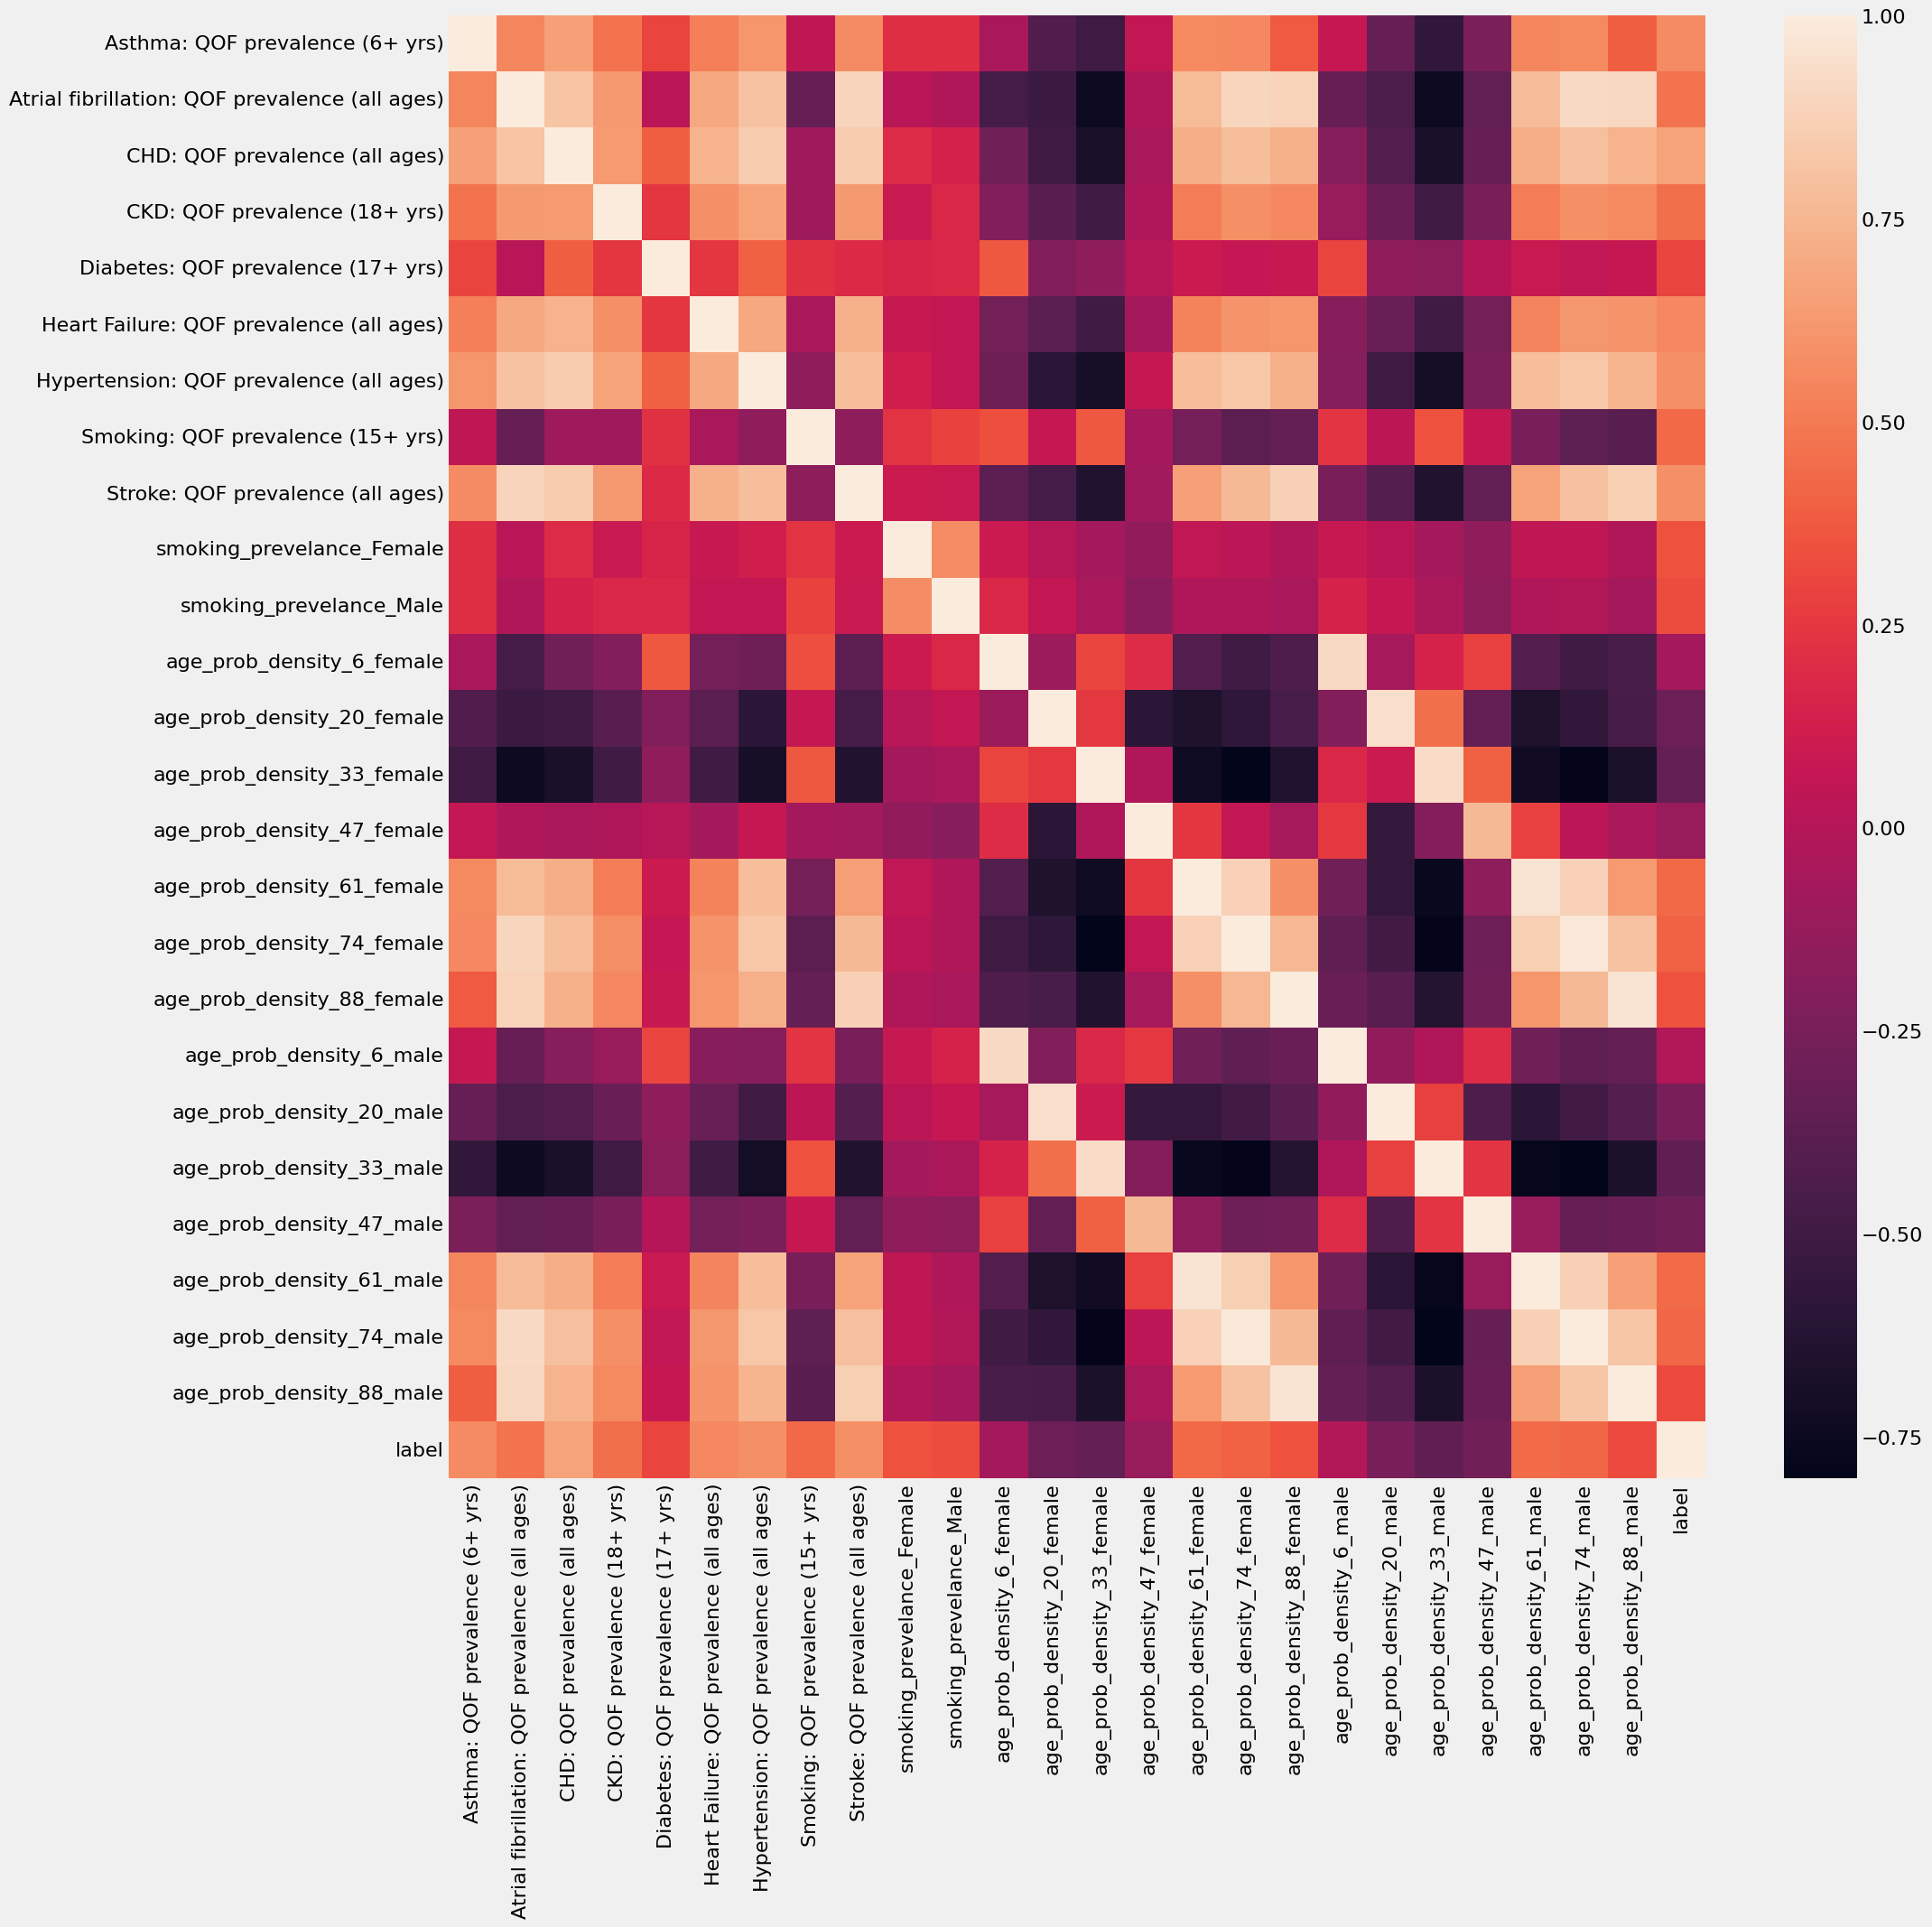

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(20, 20), dpi=100)
column_starts = [col for col in correlations.columns.values]
sns.heatmap(correlations, 
            xticklabels=column_starts,
            yticklabels=column_starts)

Some things to take away from the correlations plot:

- The top left corner (where all the diseases/conditions are) shows that most diseases/conditions are correlated with each other. That is if you have CKD you are more likely to have CHD or Atrial fibrilation. 
- It also shows that elderly people are more likely to have the diseases/conditions in the indicators (or there is better recording)
- The feature with the strongest linear correlation with the label is CHD prevelance

## Metrics

This is a regression task. That is, we need to predict a continuous output given a single or multiple inputs. Standard metrics for regression include:

- Mean Squared Error (MSE)
- Root Mean Squared Error
- Mean Absolute Error (MAE)

For loss functions Mean Squared Error punishes poor predictions more harshly the further they get from the true value. 

To choose between MSE and MAE as a loss function, a good question to answer is:

  Given a true prevelance of 0.4, one model predicts 0.3 and another predicts 0.2.

  Is model two twice as wrong as model one or is it worse than that because it was so far away.

In this instance I dont think it makes much of a difference, so I will go with MSE as it gives a stonger gradient for any model optimisation.

For evaluating model performance I will go with MAE as it is easier to understand, as if there is a MAE of 0.2 then on average the models predictions will be 0.2 away from the true result. 



In [ ]:
from numpy.core.fromnumeric import mean
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model_results(model, X, y_true):
  y_pred = model.predict(X)
  mae = mean_absolute_error(y_pred, y_true)
  mse = mean_squared_error(y_pred, y_true)
  return {
      'MAE': mae,
      'MSE': mse
  }

## Baseline

For any modelling it is important to have a naive baseline. The main reason for this is that you do not know how much better the model is than the simpliest solution. There is no point implementing a custom model with huge amounts of data if a significantly simplier model can perform just as well and is easier to understand.

For the baseline here I will use the average COPD prevelance in the training set

In [ ]:
class BaselineModel:
  def fit(self, X_train, y_train):
    self.average_y = y_train.mean()

  def predict(self, X):
    return [self.average_y]*X.shape[0]

In [ ]:
model = BaselineModel()
model.fit(X_train, y_train)
baseline_results = {
    'train_results': evaluate_model_results(model, X_train, y_train),
    'val_results': evaluate_model_results(model, X_val, y_val)
}

In [ ]:
baseline_results

{'train_results': {'MAE': 0.7243165520761197, 'MSE': 0.8636751124955492},
 'val_results': {'MAE': 0.7748049216487706, 'MSE': 0.988587607268642}}

Here the baseline is predicting the centre of the COPD distribution plotted earilier.

## Decision Tree Model

This is a very basic model, but it is a good place to start as it is very explainable and might provide some insights into relationships between the variables.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt 

In [ ]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=6)

regressor = regressor.fit(X_train, y_train)

In [ ]:
feature_importances = dict(zip(regressor.feature_names_in_, regressor.feature_importances_))

In [ ]:
feature_importances

{'Asthma: QOF prevalence (6+ yrs)': 0.008145353602823206,
 'Atrial fibrillation: QOF prevalence (all ages)': 0.024209926541417903,
 'CHD: QOF prevalence (all ages)': 0.09252775619323368,
 'CKD: QOF prevalence (18+ yrs)': 2.9069151442634555e-05,
 'Diabetes: QOF prevalence (17+ yrs)': 0.2028160168229294,
 'Heart Failure: QOF prevalence (all ages)': 0.005176023515063597,
 'Hypertension: QOF prevalence (all ages)': 0.005977878374477442,
 'Smoking: QOF prevalence (15+ yrs)': 0.18066362945852363,
 'Stroke: QOF prevalence (all ages)': 0.44507408041858043,
 'smoking_prevelance_Female': 0.01671047139690338,
 'smoking_prevelance_Male': 0.005521522160671027,
 'age_prob_density_6_female': 0.0,
 'age_prob_density_20_female': 0.0,
 'age_prob_density_33_female': 0.0,
 'age_prob_density_47_female': 0.001135404091235559,
 'age_prob_density_61_female': 3.6672115505150336e-05,
 'age_prob_density_74_female': 0.0002413861567392859,
 'age_prob_density_88_female': 0.0,
 'age_prob_density_6_male': 0.0,
 'age_

In [ ]:
decision_tree_results = {
    'train_results': evaluate_model_results(regressor, X_train, y_train),
    'val_results': evaluate_model_results(regressor, X_val, y_val)
}
decision_tree_results

{'train_results': {'MAE': 0.3485143518311844, 'MSE': 0.21856288858427958},
 'val_results': {'MAE': 0.40474733081781145, 'MSE': 0.3111759835181686}}

Ok thats a good start, we have increased the performance over the baseline by about 0.3 points

I optimised the capacity of the model by gradually increasing the tree depth until the performance on the validation set started to decrease.

It has also shown that the most useful predictors were:

- Stroke prevelence
- Diabetes prevelence
- Smoking prevelence

I am suprised, I expected smoking prevelence to be more significant.

## XG Boost

THis is a more complex non-linear model, but highly effective at many regression and classification tasks.

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [ ]:
regressor=xgb.XGBRegressor(eval_metric='rmse')
regressor.fit(X_train, y_train)

[21:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='rmse')

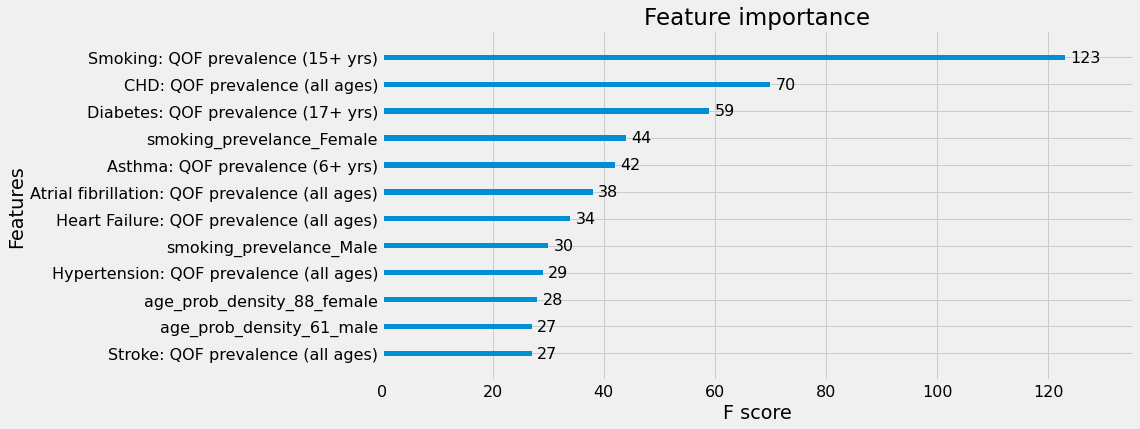

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=12, ax=ax)
plt.show();

In this model the top feature is smoking, which is different from the Decision tree regressor. The additional smoking features are also helpful to the model.

In [ ]:
xgboost_results = {
    'train_results': evaluate_model_results(regressor, X_train, y_train),
    'val_results': evaluate_model_results(regressor, X_val, y_val)
}
xgboost_results

{'train_results': {'MAE': 0.27370723398945584, 'MSE': 0.12802477822857436},
 'val_results': {'MAE': 0.31907025614846257, 'MSE': 0.19629271433087803}}

We have significantly better results with XGBoost, which is what I expected from a more powerful model.

## Test set (Sheffield) performance 

In [ ]:
test_results = evaluate_model_results(regressor, X_test, y_test)
test_results

{'MAE': 0.3555149397581502, 'MSE': 0.20230995892435236}

The performance in the test set was slightly below that in the validation set.  This could be random variation or it could be because sheffield is harder to predict.

# Further Work

There was only limited time to analyse the data and there is plenty more to do, both with the data we have and also with other data sources. 

The data used in this notebook was all either demographic data or disease prevelance data. There will be plenty more predictive features using lifestyle, deprevation and geographical data. So the first things that would be interesting to explore would be:

- Geographical data - Convert the postcodes into coordinates (lat and long potentially), this could be predictive as parts of the country might suffer from more polution than others.
- Deprevation data - Poverty has an impact on education, lifestyle and this will certainly have an impact on the prelevance of diseases
- Lifestyle data - People who excercise more or eat more healthily will likely have an impact on the prelevance of disease


Aside from more data, it would be interesting to explore the following:

- Quantile Regression - This can provide confidence intervals for the output predictions, hence giving more confidence in the models predictions
- Hyperparameter optimisation - For the best performance we would need to optimise the model parameters, where the bins are placed
- Clustering of disease prelevance - Similiar to the correlation plot, but we could use unsupervised techniques like k-means to see which GP's have similiar disease prelevances. THis could be useful as if particular prevention strategies have helped at one, they could be applicable to others.
- Time series analysis - How have the prelevance of these diseases changed over time? This could help identify where prevention strategies have been successful